<h1>classification of wine</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [93]:
df_red_wine = pd.read_csv('C:/Users/1/Desktop/уник/Datasets/Red.csv', sep=',')
df_red_wine['Year'] = df_red_wine['Year'].replace('N.V.', '2030') 
df_red_wine = df_red_wine.sort_values (by = ['Year', 'Price'], ascending = [ False , False ])
df_red_wine.head(10)
#df_red_wine.shape

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
282,Overture N.V.,United States,Napa Valley,Opus One,4.4,10799,154.99,2030
943,Red Blend N.V.,Chile,Lontue Valley,Caballo Loco,4.4,13136,34.07,2030
2404,Limited Edition 10 Vendemmie N.V.,Italy,Montepulciano d'Abruzzo,Tenuta Ulisse,4.6,2080,30.90,2030
2201,Cinquanta Collezione N.V.,Italy,Vino d'Italia,San Marzano,4.3,19454,16.38,2030
197,Délicate N.V.,South Africa,Stellenbosch,De Toren,4.1,1056,14.38,2030
4833,Little James' Basket Press Rouge N.V.,France,Vin de France,Château de Saint Cosme,3.6,3818,7.90,2030
5632,Tre Autoctoni Evoluzione Notturnia N.V.,Italy,Vino d'Italia,Farnese,3.7,461,7.75,2030
4527,Lambrusco Reggiano Dolce N.V.,Italy,Reggiano,Riunite,3.7,359,5.89,2030
6138,Barda Pinot Noir 2019,Argentina,Patagonia,Chacra,3.7,52,21.35,2019
92,Coume de l'Olla Rouge 2019,France,Vin de France,Matassa,4.1,102,16.96,2019


In [3]:
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8666 entries, 282 to 2333
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 609.3+ KB


In [4]:
df_red_wine.describe()

,Rating,NumberOfRatings,Price
count,8666.000000,8666.000000,8666.000000
mean,3.890342,415.287445,39.145065
std,0.308548,899.726373,84.936307
min,2.500000,25.000000,3.550000
25%,3.700000,66.000000,10.680000
50%,3.900000,157.000000,18.200000
75%,4.100000,401.000000,38.142500
max,4.800000,20293.000000,3410.790000


<h3>Distribution of countries in pie and bar chart format</h3

In [75]:
df_red_wine['Country'].value_counts()

Country
Italy            2650
France           2256
Spain            1142
South Africa      500
United States     374
Chile             326
Germany           248
Argentina         246
Australia         246
Portugal          230
Austria           220
New Zealand        63
Brazil             40
Romania            23
Lebanon            15
Greece             13
Israel             13
Switzerland        12
Hungary             9
Moldova             8
Slovenia            8
Turkey              6
Georgia             5
Uruguay             4
Croatia             2
Canada              2
Bulgaria            2
China               1
Slovakia            1
Mexico              1
Name: count, dtype: int64

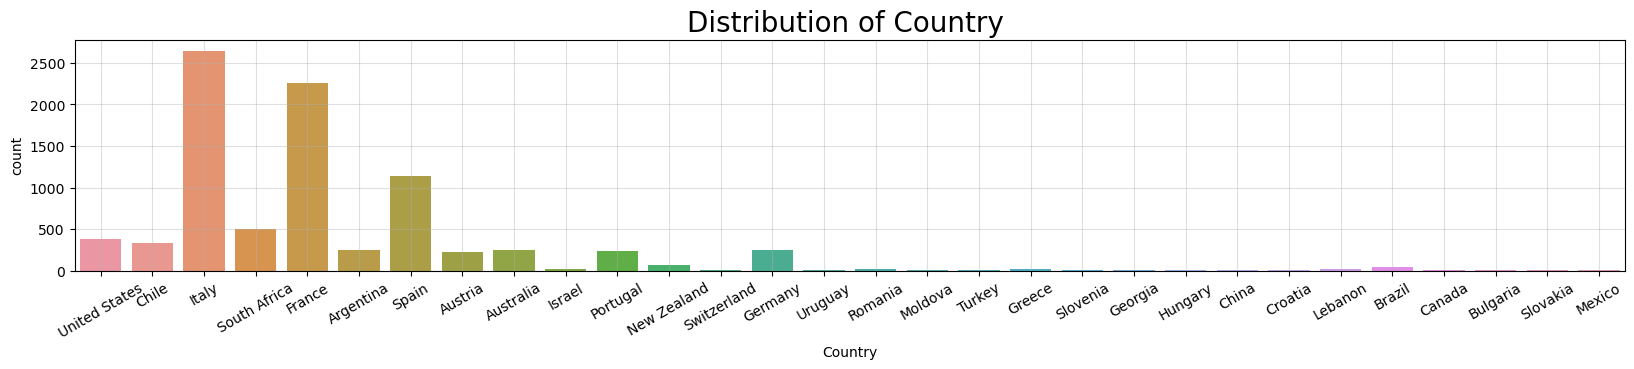

In [6]:
fig, axes = plt.subplots(1, figsize=(20,3))
sns.countplot(data=df_red_wine, x='Country' )
plt.title('Distribution of Country ', fontsize=20)
plt.grid(alpha=0.4)
plt.xticks(rotation = 30)
plt.show()

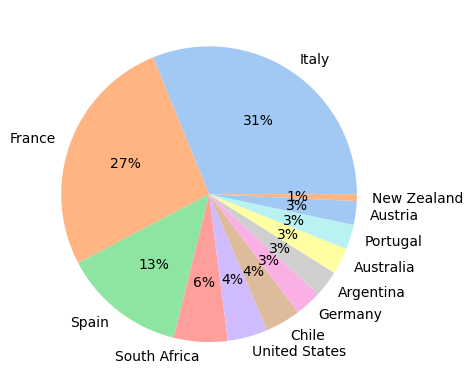

In [7]:
colors = sns.color_palette('pastel')
country = df_red_wine['Country'].value_counts()
country = country.index.to_list()
country = country[:12] # In total, 30 countries are represented in the data, for presentation we will take the first 12 for ease of perception

country_n = df_red_wine['Country'].value_counts().to_list()
country_n = country_n[:12]

#create pie chart
plt.pie(country_n, labels= country, colors = colors, autopct='%.0f%%')
plt.show()

__Distribution by region of the main producing countries__

In [8]:
region = df_red_wine.groupby('Country')['Region'].value_counts().to_frame()
region.head()

count
Country   Region              
Argentina Mendoza          122
          Tupungato         32
          Uco Valley        28
          Lujan de Cuyo     13
          San Juan          12

__Distribution of regions of France__

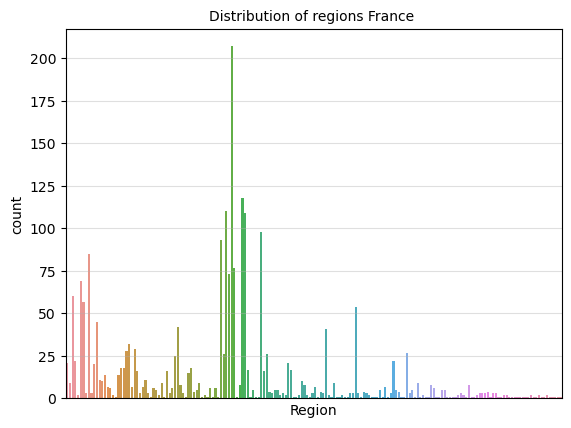

In [9]:
regions_France = df_red_wine.loc[df_red_wine['Country'] == 'France']
sns.countplot(data=regions_France, x='Region')
plt.title('Distribution of regions France ', fontsize=10)
plt.grid(alpha=0.4)
plt.xticks([])
plt.show()

__Distribution of regions of Spain__

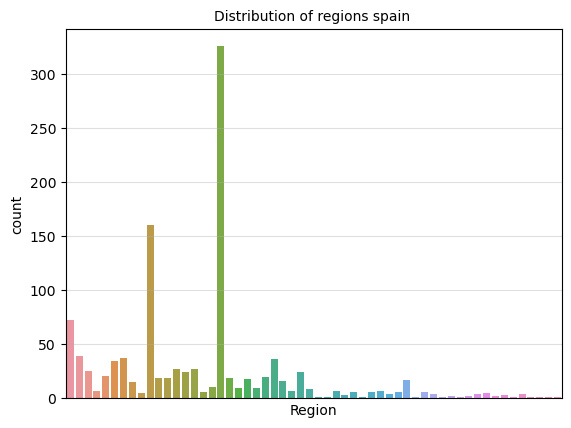

In [10]:
regions_Spain = df_red_wine.loc[df_red_wine['Country'] == 'Spain']
sns.countplot(data=regions_Spain, x='Region')
plt.title('Distribution of regions spain ', fontsize=10)
plt.grid(alpha=0.4)
plt.xticks([])
plt.show()

__Distribution of regions of Italy__

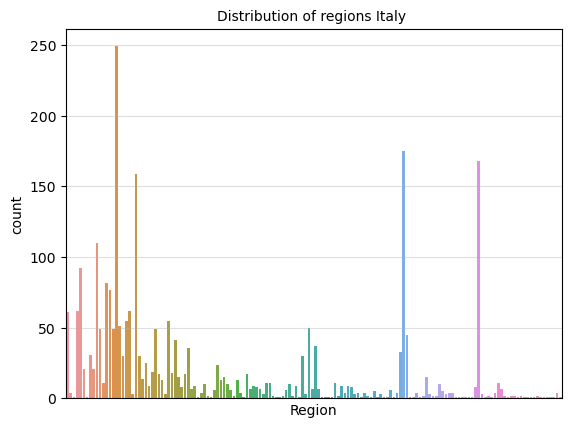

In [11]:
regions_Italy = df_red_wine.loc[df_red_wine['Country'] == 'Italy']
sns.countplot(data=regions_Italy, x='Region')
plt.title('Distribution of regions Italy ', fontsize=10)
plt.grid(alpha=0.4)
plt.xticks([])
plt.show()

__Price distribution__

In [12]:
df_red_wine['Price'].value_counts()

Price
9.90      66
9.50      62
15.90     53
16.90     50
14.90     47
          ..
7.84       1
8.06       1
8.14       1
8.47       1
209.60     1
Name: count, Length: 2491, dtype: int64

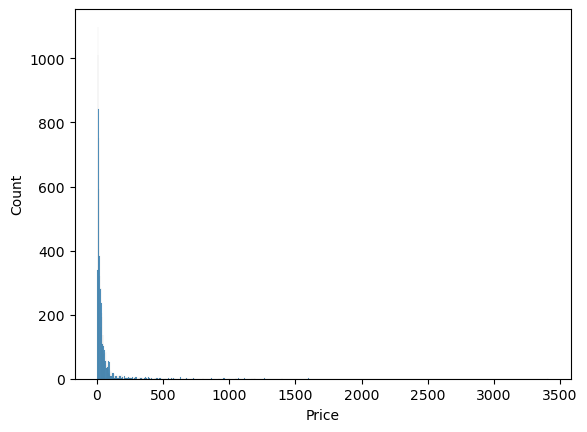

In [13]:
price = sns.histplot(df_red_wine['Price'])

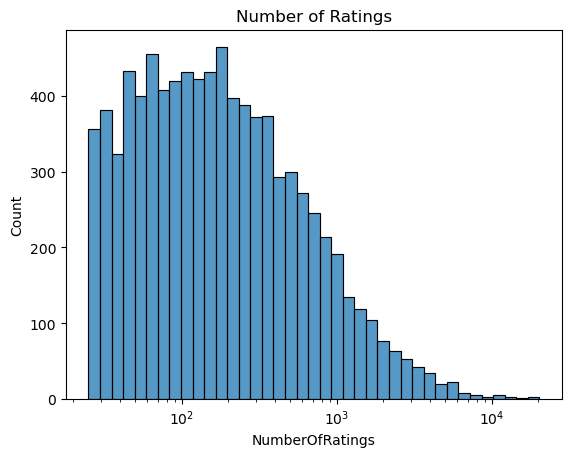

In [14]:
sns.histplot(data = df_red_wine ,x=df_red_wine['NumberOfRatings'], log_scale=True)
plt.title('Number of Ratings')
plt.show()

__Price distribution with logarithmic scale__

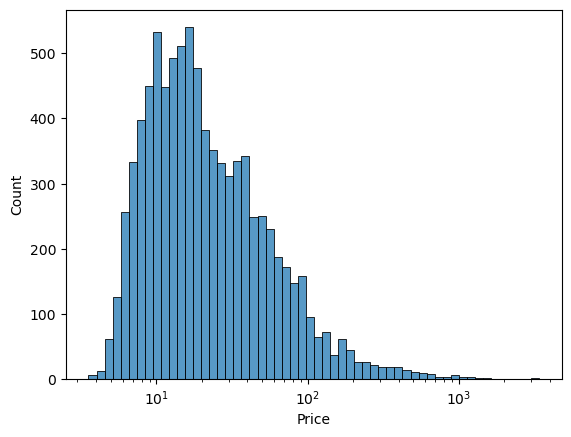

In [15]:
price = sns.histplot(df_red_wine['Price'], log_scale=True)

__Let's find the percentile for the main range of values (for 95% of all observations)__

__using the function numpy.percentile()__
Thus, outliers are removed, and work will continue with 95% of all observations

In [16]:
pr_5 = np.percentile(df_red_wine['Price'], 5)
pr_95 = np.percentile(df_red_wine['Price'], 95)

print('5th percentile -', pr_5, '\n95th percentile -', pr_95)


5th percentile - 6.5 
95th percentile - 118.6225


In [77]:
mid_price =  df_red_wine.copy()
mid_price = mid_price.loc[(mid_price['Price'] < 119)]

__Price distribution for 95% of all observations on a linear scale__

<Axes: xlabel='Price', ylabel='Count'>

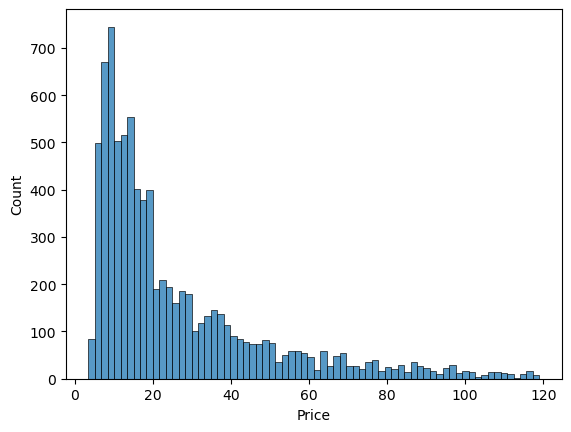

In [78]:
sns.histplot(mid_price, x = 'Price', bins=70)

<h1></h1>

<h2>Study of the linear dependence of the main numerical indicators</h2>

In [79]:
mid_price = mid_price.sort_values (by = ['Year', 'Price'], ascending = [ False , True ])

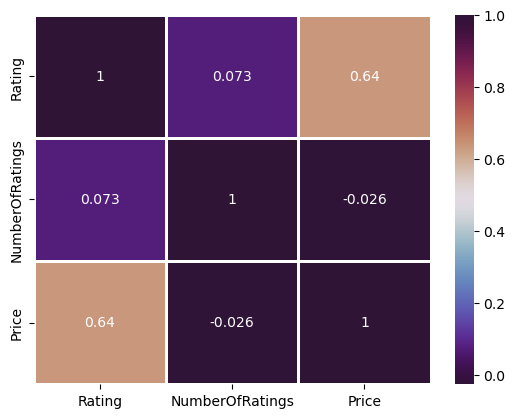

In [80]:
corr_map = sns.heatmap(mid_price.select_dtypes(include =['float64', 'int64']).corr(), annot=True, cmap='twilight_shifted', linewidths=1)


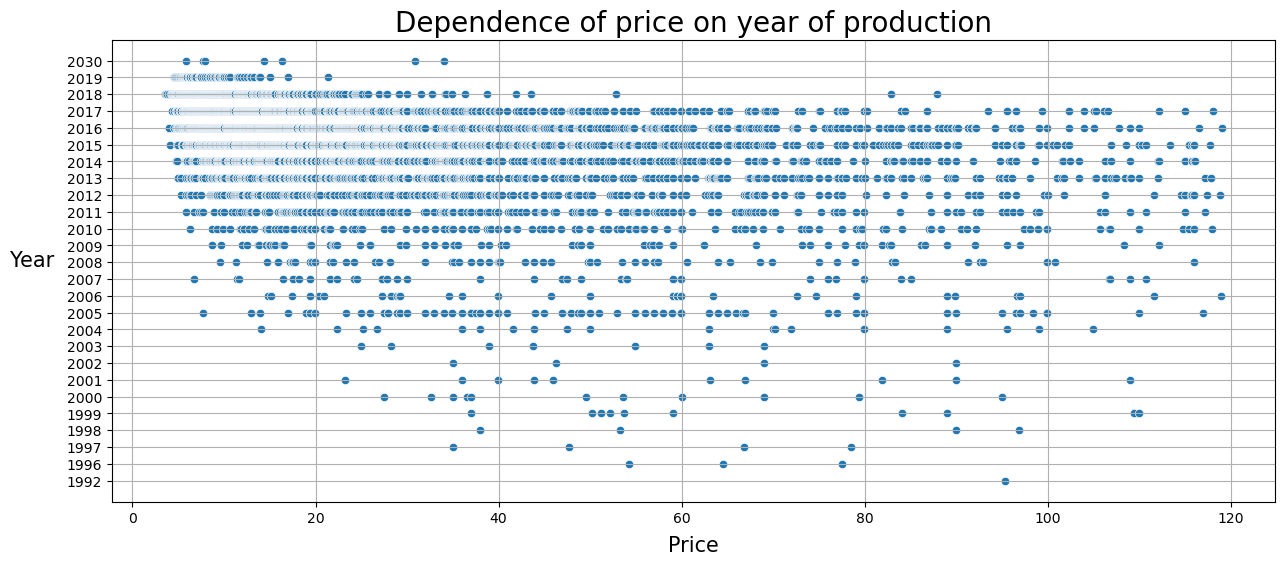

In [81]:
fig, axes = plt.subplots(1, figsize=(15,6))
sns.scatterplot(data=mid_price, x='Price', y='Year')
axes.set_alpha(0.8)
axes.set_title( 'Dependence of price on year of production', fontsize = 20)
axes.set_xlabel('Price', fontsize = 15, labelpad= 7)
axes.set_ylabel('Year', fontsize = 15, rotation = 0, labelpad = 25)
axes.grid(0.2)

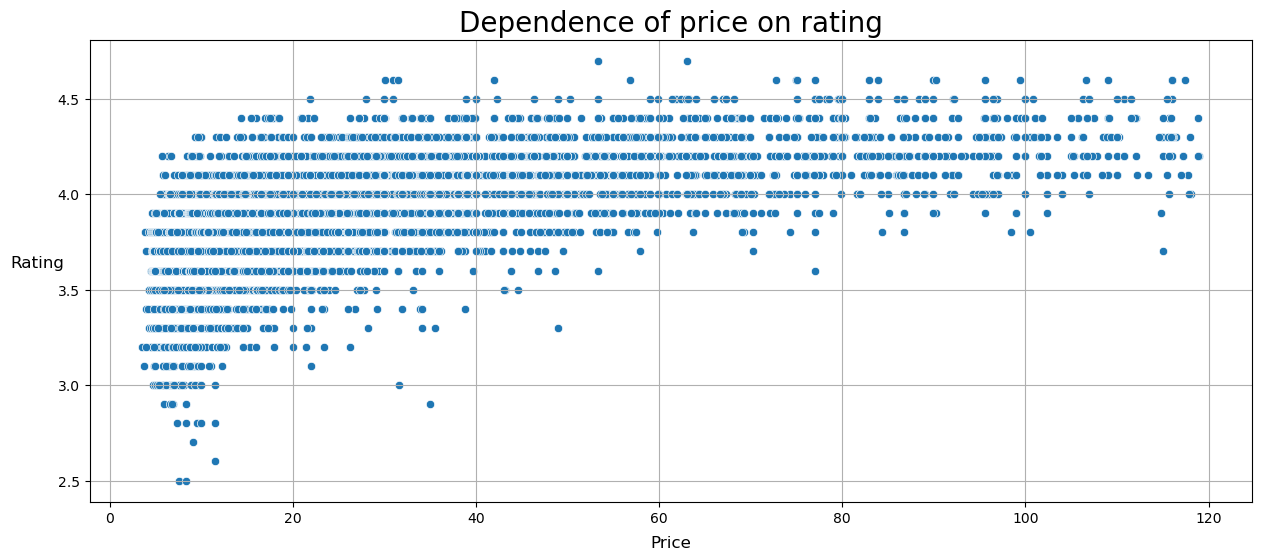

In [82]:
fig, axes = plt.subplots(1, figsize=(15,6))
sns.scatterplot(data=mid_price, x='Price', y='Rating')
axes.set_alpha(0.8)
axes.set_title('Dependence of price on rating', fontsize = 20)
axes.set_xlabel('Price', fontsize = 12, labelpad= 7)
axes.set_ylabel('Rating', fontsize = 12, rotation = 0, labelpad = 15)
axes.grid(0.2)

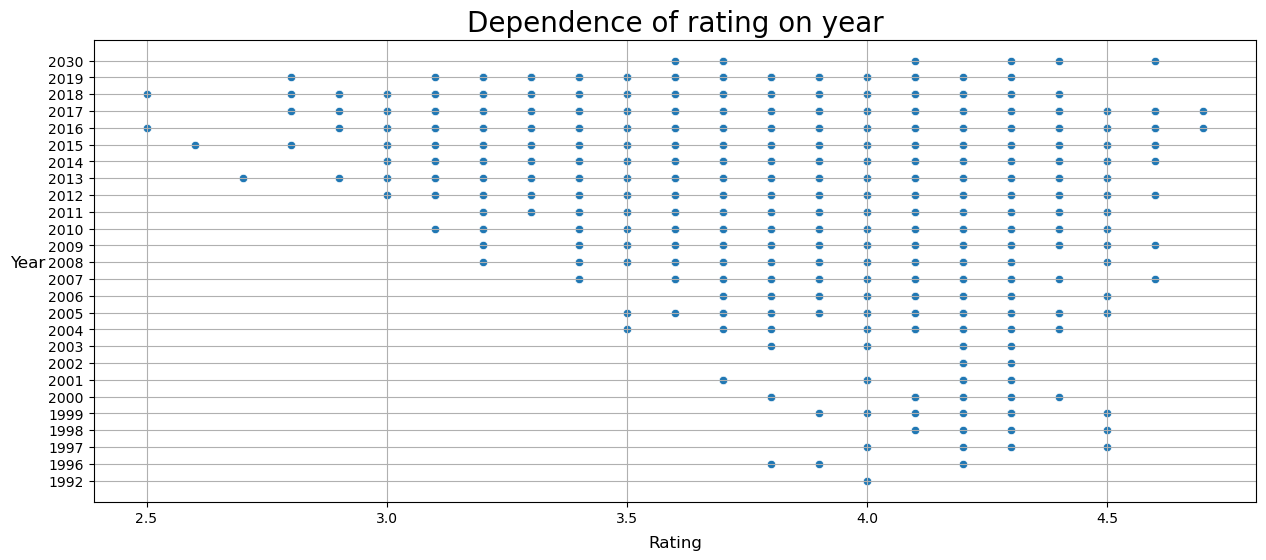

In [83]:
fig, axes = plt.subplots(1, figsize=(15,6))
sns.scatterplot(data=mid_price, x='Rating', y='Year')
axes.set_alpha(0.8)
axes.set_title('Dependence of rating on year', fontsize = 20)
axes.set_xlabel('Rating', fontsize = 12, labelpad= 7)
axes.set_ylabel('Year', fontsize = 12, rotation = 0, labelpad = 15)
axes.grid(0.2)

__Distribution of wines by year__

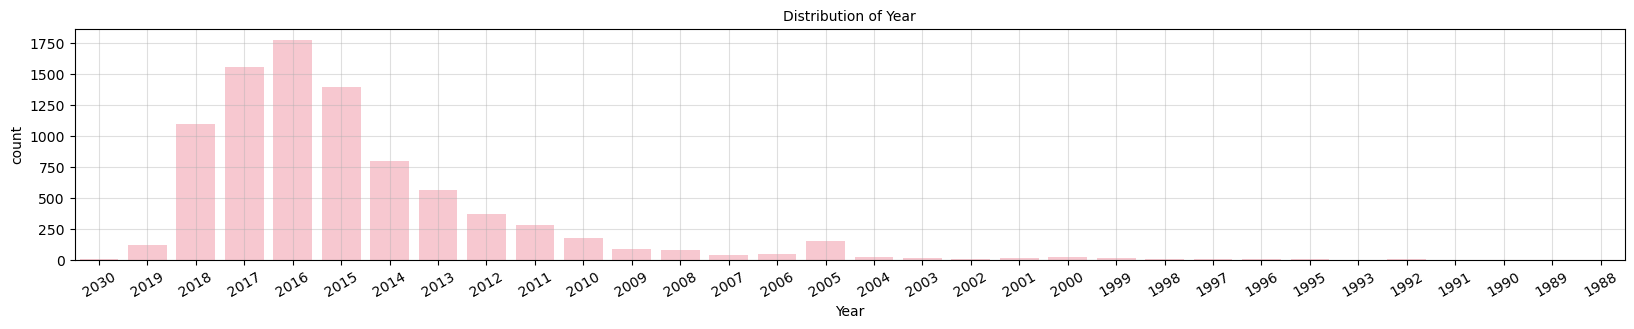

In [84]:
fig, axes = plt.subplots(1, figsize=(20,3))
sns.countplot(data=df_red_wine, x='Year', color='pink')
plt.title('Distribution of Year', fontsize=10)
plt.grid(alpha=0.4)
plt.xticks(rotation = 30)
plt.show()

<h2>Wine rating</h2>

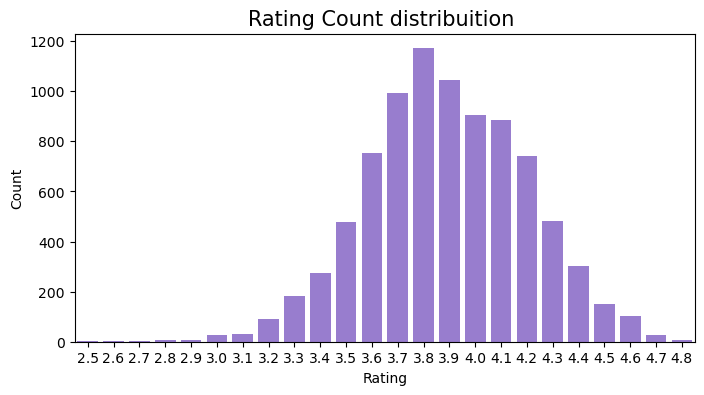

In [85]:
plt.figure(figsize=(8, 4))
graph = sns.countplot(x='Rating', data=df_red_wine, color='mediumpurple')
graph.set_title("Rating Count distribuition ", fontsize=15)
graph.set_xlabel("Rating", fontsize=10) 
graph.set_ylabel("Count", fontsize=10)
plt.show()


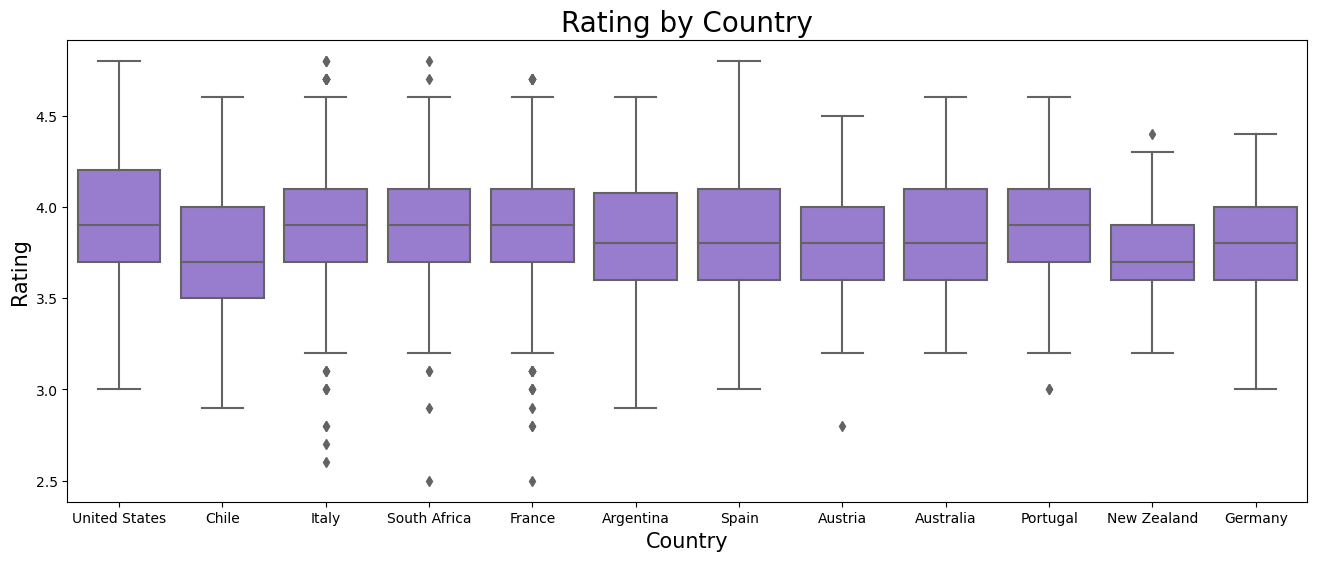

In [86]:
plt.figure(figsize=(16,6))

graph = sns.boxplot(x='Country', y='Rating',
                 data=df_red_wine[df_red_wine.Country.isin(df_red_wine.Country.value_counts()[:12].index.values)],
                 color='mediumpurple')
graph.set_title("Rating by Country", fontsize=20)
graph.set_xlabel("Country", fontsize=15)
graph.set_ylabel("Rating", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

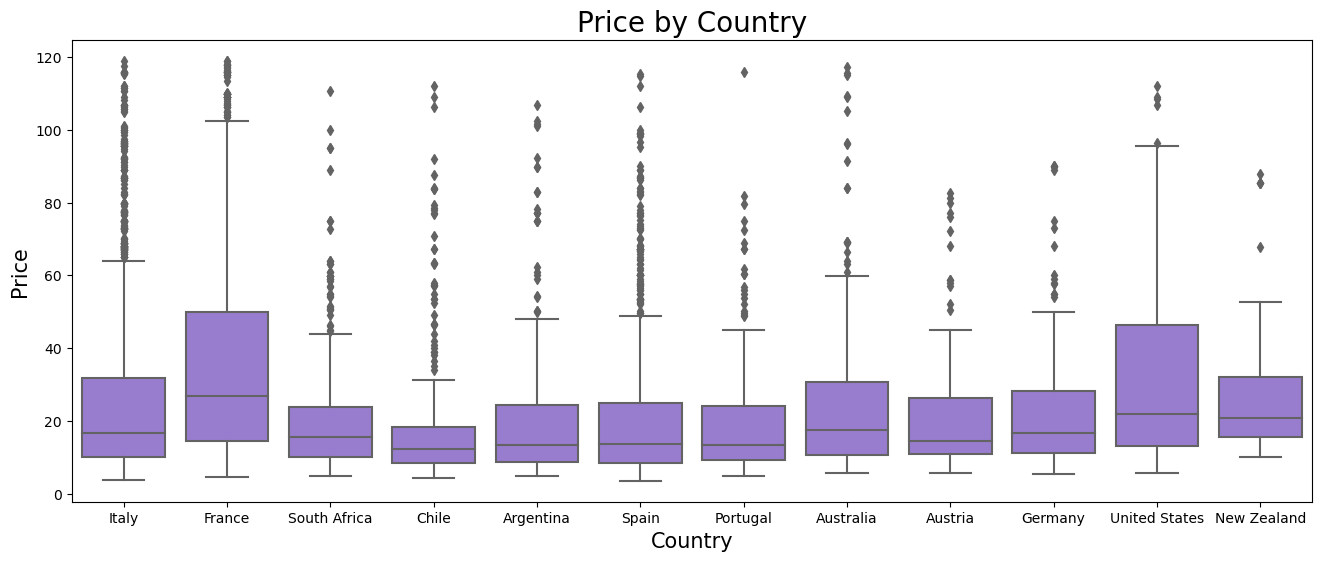

In [87]:
plt.figure(figsize=(16,6))

graph = sns.boxplot(x='Country', y='Price',
                 data=mid_price[mid_price.Country.isin(df_red_wine.Country.value_counts()[:12].index.values)],
                 color='mediumpurple')
graph.set_title("Price by Country", fontsize=20)
graph.set_xlabel("Country", fontsize=15)
graph.set_ylabel("Price", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

<h3>Machine Learning</h3>

In [95]:
from sklearn import svm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [96]:
mid_price['Price'].value_counts().size

2210

In [97]:
mid_price['Country'].value_counts().size

30

In [98]:
mid_price['NumberOfRatings'].value_counts().size

1524

___Feature Design. Processing categorical data___

Classification of objects by the rating field; we use markers to simplify the task. Markers from 1 to 5.
<ul>
    <li>1 - (from 2.5 to 3)</li>
    <li>2 - (from 3 to 3.5)</li>
    <li>3 - (from 3.5 to 4)</li>
    <li>4 - (from 4 to 4.5)</li>
    <li>5 - (from 4.5 to 5)</li>
</ul>

In [101]:
data = mid_price.copy() 
data = data.drop(['Name', 'Winery'], axis=1) 
data = data[data['NumberOfRatings'].apply(lambda x: x>99)]
data['NumberOfRatings'].value_counts().size

1449

In [102]:
data = data.drop('NumberOfRatings', axis=1)

In [103]:
#creating labels for the target vector
data.loc[(data['Rating'] >= 2.5) & (data['Rating'] < 3), 'Rating'] = 1
data.loc[(data['Rating'] >= 3) & (data['Rating'] < 3.5), 'Rating'] = 2
data.loc[(data['Rating'] >= 3.5) & (data['Rating'] < 4), 'Rating'] = 3
data.loc[(data['Rating'] >= 4) & (data['Rating'] < 4.5), 'Rating'] = 4
data.loc[(data['Rating'] >= 4.5) & (data['Rating'] < 5), 'Rating'] = 5

In [105]:
x = data[['Country','Region', 'Price', 'Year']].copy() # creating a feature matrix
x # type of object pandas.core.frame.DataFrame


,Country,Region,Price,Year
4527,Italy,Reggiano,5.89,2030
5632,Italy,Vino d'Italia,7.75,2030
4833,France,Vin de France,7.90,2030
197,South Africa,Stellenbosch,14.38,2030
2201,Italy,Vino d'Italia,16.38,2030
...,...,...,...,...
2563,Lebanon,Bekaa Valley,37.92,1998
8317,France,Saint-Julien,89.95,1998
981,France,Saint-Émilion Grand Cru,96.85,1998
7358,Lebanon,Bekaa Valley,47.67,1997


In [110]:
x['Price'] = x['Price'].round() # Round the price, artificially reducing the number of unique values 

In [111]:
y = data['Rating'].copy() #creating a target vector

In [108]:
ord_enc = OrdinalEncoder()# coding of categorical data
x['id_region'] = ord_enc.fit_transform(x[['Region']])
x['id_country'] = ord_enc.fit_transform(x[['Country']])
x['id_year'] = ord_enc.fit_transform(x[['Year']])
x = x.drop(['Country', 'Region', 'Year'], axis=1)

In [112]:
# splitting data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.2)

<h3>Support vector machine (Kernel - Radial Basis Function)</h3>

In [113]:
#param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01]}
#rbf_svc = GridSearchCV(svm.SVC(kernel='rbf'),param_grid,refit=True,verbose=2)

rbf_svc = svm.SVC(kernel='rbf', gamma=0.01, C=1)
rbf_svc.fit(x_train,y_train)

SVC(C=1, gamma=0.01)

In [114]:
y_predict_1 = rbf_svc.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_1))

Accuracy: 0.7475915221579962


In [116]:
print(classification_report(y_test, y_predict_1))

              precision    recall  f1-score   support

         2.0       0.40      0.04      0.07        53
         3.0       0.75      0.86      0.80       583
         4.0       0.75      0.71      0.72       390
         5.0       0.00      0.00      0.00        12

    accuracy                           0.75      1038
   macro avg       0.47      0.40      0.40      1038
weighted avg       0.72      0.75      0.73      1038



<h3>Random Forest</h3>

In [117]:
forest = RandomForestClassifier(n_estimators=100,
                                 criterion="entropy", 
                                 max_depth=20,
                                 min_samples_split=10,
                                 min_samples_leaf=10,
                                 random_state=10)
forest.fit(x_train,y_train)
y_predict_2 = forest.predict(x_test)

In [118]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_2))

Accuracy: 0.7591522157996147


In [119]:
print(classification_report(y_test, y_predict_2))

              precision    recall  f1-score   support

         2.0       0.33      0.02      0.04        53
         3.0       0.76      0.87      0.81       583
         4.0       0.77      0.71      0.74       390
         5.0       0.00      0.00      0.00        12

    accuracy                           0.76      1038
   macro avg       0.46      0.40      0.40      1038
weighted avg       0.73      0.76      0.73      1038



C:\Users\1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
